In [ ]:
# For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), 
# then give an example of what a true positive, true negative, type I and type II errors would look like. 
# Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more 
# precise questions that could be tested.

   




In [ ]:
# Has the network latency gone up since we switched internet service providers?

# H0 = The network latency has stayed the same since switching providers.
# Ha = The network latency has gone up since switching providers.
# Tp = The hypothesis said the latency would be higher, and it was measured to have increased.
# Tn = The hypothesis said the latency would be the same, but it was measured to have stayed the same.
# T1 = The latency stayed the same, but the hypothesis predicted it was going to be higher.
# T2 = The latency went up, but the hypothesis predicted to be it to not change.

In [ ]:
# Is the website redesign any good?

# H0 = This website redesign is just as good as the previous design.
# Ha = This website redesign is an improvement.
# Tp = The website redesign was predicted to be an improvement, and it was measured to have improved traffic to the website.
# Tn = The website redesign was predicted to be about the same as the original, and traffic stayed the same.
# T1 = The traffic stayed the same , but the hypothesis predicted that traffic would increase. 
# T2 = The hypothesis predicted traffic would stay the same, but it increased. 

In [1]:
# Is our television ad driving more sales?

# H0 = Sales have stayed the same as a result of the ad.
# Ha = Sales have decreased due to the backlash from the ad.
# Tp = Sales have decreased as predicted.
# Tn = Sales have maintained the same level as predicted.
# T1 = Sales were predicted to fall, but they stayed the same.
# T2 = Sales were predicted to stay the same but they fell. 

In [24]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from pydataset import data
import env

def get_db_url(hostname, username, password, database):
    url = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'
    return url

url_emp = get_db_url(env.hostname, env.username, env.password, "employees")

In [4]:
    # Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. 
    # A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
    # A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
    # Use a .05 level of significance.
α = .05
t_val, p_val = stats.ttest_ind_from_stats(90, 15, 40, 100, 20, 50, equal_var = False, alternative = "two-sided")
t_val, p_val < α

(-2.7091418459143854, True)

In [14]:
# Load the mpg dataset and use it to answer the following questions:

mpg = data("mpg")
# print(mpg.head(2))

# #     Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

mpg_08 = 2 / (1/(mpg.loc[(mpg["year"] == 2008)]["hwy"]) +
          1/(mpg.loc[(mpg["year"] == 2008)]["cty"]))
mpg_99 = 2 / (1/(mpg.loc[(mpg["year"] == 1999)]["hwy"]) +
          1/(mpg.loc[(mpg["year"] == 1999)]["cty"]))

t_check, p_check = stats.levene(mpg_99, mpg_08)
t_check, p_check < .05 # variance is equal 

t_stat, p_val = stats.ttest_ind(mpg_99, mpg_08)
print(t_stat, p_val < .05)

# # There is no significant difference between the fuel efficiencies.

# #     Are compact cars more fuel-efficient than the average car?

mpg_comp = 2 / (1/(mpg.loc[(mpg["class"] == "compact")]["hwy"]) +
          1/(mpg.loc[(mpg["class"] == "compact")]["cty"]))
mpg_all = 2 / (1/(mpg.loc[(mpg["class"] != "compact")]["hwy"]) +
          1/(mpg.loc[(mpg["class"] != "compact")]["cty"]))

t_stat, p_val = stats.ttest_ind(mpg_comp, mpg_all)
print(t_stat, p_val < .05)

#     Do manual cars get better gas mileage than automatic cars?
mpg["avg_fuel"] = stats.hmean(mpg[["cty","hwy"]], axis=1)
mask_man = mpg["trans"].str.contains("manual")
mpg_man = mpg.loc[(mask_man)]
mask_auto = mpg["trans"].str.contains("auto")
mpg_auto = mpg.loc[(mask_auto)]
mpg_man = mpg_man.avg_fuel
mpg_auto = mpg_auto.avg_fuel

t_stat, p_val = stats.ttest_ind(mpg_man, mpg_auto)
print(t_stat > 0, (p_val/2) < .05)

0.3011962975077886 False
6.659517511642352 True
True True


In [ ]:
# Use the telco_churn data. 



# Does tenure correlate with monthly charges? 

sns.relplot

r, p = stats.pearsonr.(df.tenure, df.monthlycharges)
r, p

# Total charges?

df.totalchargs.str.replace(" ", "0").astype(float)
# or df.totalcharges = df[df.totalcharges != " "]

r, p = stats.pearsonr(df.tenure, df. totalcharges)
r, p

# What happens if you control for phone and internet service?

sns.relplot(data = df, x = df.tenure, y = df.totatlcharges, hue = df.phoneservice, col = df.internetservice)
df.groupby(["internetservice", "phoneservice"]).count()



In [ ]:
# Use the employees database.

# Is there a relationship between how long an employee has been with the company and their salary?

query = '''SELECT *
           FROM employees
           JOIN salaries
           USING (emp_no)
           WHERE to_date > CURDATE()'''

# Is there a relationship between how long an employee has been with the company and the number of titles they have had?

query = '''SELECT emp_no, datediff(max(to_dat), min(to_date)) as tenure, COUNT(title) as num_titles 
           FROM titles
           GROUP BY emp_no
           WHERE to_date > CURDATE()'''

In [2]:
# Use the sleepstudy data. 

sleep = data("sleepstudy")

# Is there a relationship between days and reaction time?




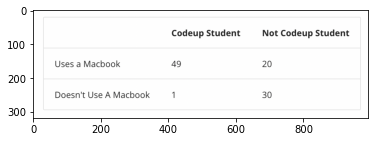

In [6]:
# Use the following contingency table to help answer the question of whether using a macbook and 
# being a codeup student are independent of each other.
image = mpimg.imread("chi2_exercise1_table.png")
plt.imshow(image)
plt.show()

In [13]:
# H0 = Using a MacBook and being a CodeUp student are independent of each other.
# Ha = Using a MacBook and being a CodeUp student are not independent of each other.

observed = pd.DataFrame([[49, 20],
                        [1, 30]], 
                        index = ["Uses a Macbook", "Doesn't Use a Macbook"], 
                        columns = ["Codeup Student", "Not a Codeup Student"])

chi2, p, degf, expected = stats.chi2_contingency(observed)
α = .05

print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degf(k)  = {degf:.1f}')

p < α

# Τhe H0 can be rejected.

Observed
[[49 20]
 [ 1 30]]

Expected
[[34 34]
 [15 15]]

----
chi^2 = 36.6526
p     = 0.0000
degf(k)  = 1.0


True

In [23]:
# Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them.

observed = pd.crosstab(mpg., mpg.displ.mean())

# Be sure to state your null and alternative hypotheses.

chi2, p, degf, expected = stats.chi2_contingency(observed)
α = .05

print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degf(k)  = {degf:.1f}')

# p < α

Observed
[[18]
 [19]
 [37]
 [25]
 [ 9]
 [14]
 [ 8]
 [ 4]
 [ 3]
 [ 4]
 [13]
 [ 5]
 [14]
 [34]
 [27]]

Expected
[[18]
 [19]
 [37]
 [25]
 [ 9]
 [14]
 [ 8]
 [ 4]
 [ 3]
 [ 4]
 [13]
 [ 5]
 [14]
 [34]
 [27]]

----
chi^2 = 0.0000
p     = 1.0000
degf(k)  = 0.0


In [59]:


# Use the data from the employees database to answer these questions:
 
# Is a current employee's gender independent of whether they work in sales or marketing?

query = '''SELECT emp_no, gender, dept_name
           FROM employees
           LEFT JOIN dept_emp
           USING (emp_no)
           LEFT JOIN departments
           USING (dept_no)
           WHERE to_date > CURDATE()
           AND dept_name in ("Sales", "Marketing")
           GROUP BY gender, emp_no, dept_name;'''

df = pd.read_sql(query, url_emp)

observed = pd.crosstab(df.gender, df.dept_name)

chi2, p, degf, expected = stats.chi2_contingency(observed)
α = .05

print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degf(k)  = {degf:.1f}', "\n")

p < α

# Is an employee's gender independent of whether or not they are or have been a manager?


query = '''SELECT emp_no, gender, title
           FROM employees
           LEFT JOIN titles
           USING (emp_no)
           WHERE title = "Manager"
           GROUP BY gender, title, emp_no ;'''

df = pd.read_sql(query, url_emp)

observed = pd.crosstab(df.emp_no, df.gender)

chi2, p, degf, expected = stats.chi2_contingency(observed)
α = .05

print('Observed')
print(observed.values)
print('\nExpected')
print(expected.astype(int))
print('\n----')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')
print(f'degf(k)  = {degf:.1f}')

p < α

Observed
[[ 5864 14999]
 [ 8978 22702]]

Expected
[[ 5893 14969]
 [ 8948 22731]]

----
chi^2 = 0.3240
p     = 0.5692
degf(k)  = 1.0 

Observed
[[0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [1 0]
 [1 0]
 [0 1]]

Expected
[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]

----
chi^2 = 24.0000
p     = 0.4038
degf(k)  = 23.0


False